Mini Project- Python
TOPIC-Indian food delivery restaurent aggregator

1. Import libraries that you required and Load the data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Zomoto.CSV")

2. Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [3]:
print(pd.DataFrame(df["name"].value_counts()).head(10))

                           name
Cafe Coffee Day              18
Keventers                    17
Onesta                       17
McDonald's                   16
SGS Non Veg - Gundu Pulav    16
The Chocolate Heaven         16
Baskin Robbins               16
Mad Over Donuts              15
Tata Cha                     15
Petoo                        15


3. How many restaurants do not accept online orders?

In [4]:
no_df=df.where(df['online_order']=='No')
no_df.dropna(inplace=True)
no_df.shape[0]
ln=no_df['name'].unique()
ln.shape[0]
print(f"{ln.shape[0]} restaurents doesn't accept online orders")

655 restaurents doesn't accept online orders


In [5]:
yes_df=df.where(df['online_order']=='Yes')
yes_df.dropna(inplace=True)
ly=yes_df['name'].unique()

4. What is the ratio b/w restaurants that provide and do not provide table booking?

In [6]:
tn=pd.DataFrame(df.groupby(by='book_table'))[1][0]
tn.dropna(inplace=True)
ty=pd.DataFrame(df.groupby(by='book_table'))[1][1]
ty.dropna(inplace=True)
print(f"The ratio between restaurants that provide and do not provide table booking is 1:{ty['name'].unique().shape[0]/tn['name'].unique().shape[0]}")

The ratio between restaurants that provide and do not provide table booking is 1:0.3292929292929293


5. Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

In [4]:
df["rate"].replace(to_replace=["NEW",'-'],value=np.nan,inplace=True)
df.dropna(subset="rate",inplace=True)
r=[]
for i in df["rate"]:
    s=i.split("/")[0]
    r.append(s)
df["rating"]= r
df['rating']=pd.to_numeric(df['rating'])

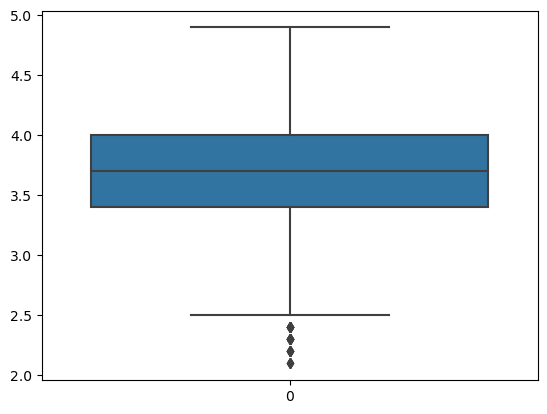

In [5]:
sns.boxplot(df['rating'])
plt.show()

6. Online and Offline orders restaurants percentage.

In [9]:
print(f'Online order percentage is {ly.shape[0]/(ln.shape[0]+ly.shape[0])*100}')

Online order percentage is 67.39671478347437


In [10]:
print(f'Offline order percentage is {ln.shape[0]/(ln.shape[0]+ly.shape[0])*100}')

Offline order percentage is 32.603285216525634


7. Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.

In [7]:
def removee(x):
    s=[]
    for i in x:
        
        v=str(i).replace(",",'')
        s.append(int(v))
    return s

In [8]:
df.dropna(subset="approx_cost(for two people)",inplace=True)
removee(df["approx_cost(for two people)"])
df["approx_cost(for two people)"]=removee(df["approx_cost(for two people)"])

<Axes: xlabel='approx_cost(for two people)', ylabel='rating'>

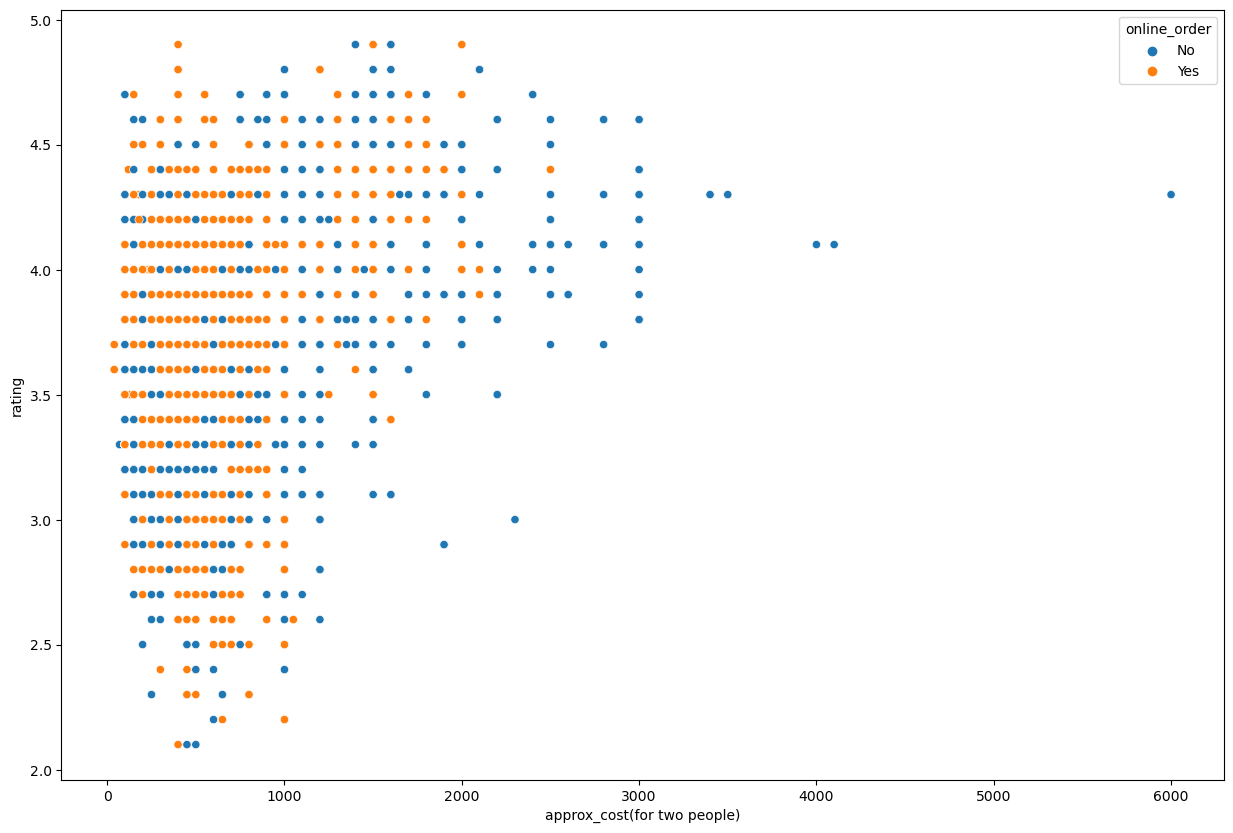

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,y='rating',x="approx_cost(for two people)",hue='online_order')

8. Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

In [14]:
def plot_dist(cols):
    sns.histplot(data=df,x=cols,kde=True)
    plt.show()

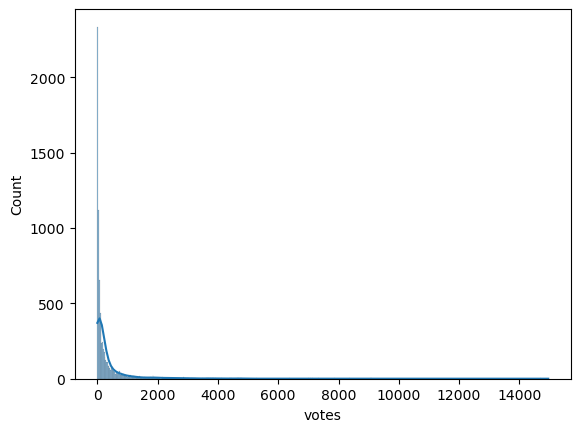

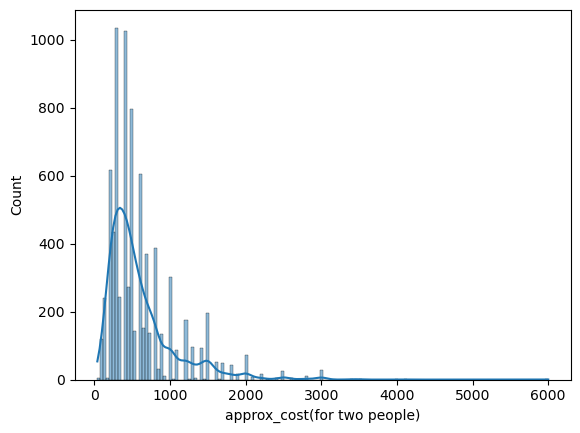

In [15]:
for col in[df['votes'],df['approx_cost(for two people)']]:
    plot_dist(col)

9. Which are the most common restaurant type in Banglore?

In [16]:
l1=list(pd.DataFrame(df['rest_type'].value_counts()).head().index)
print(f"The most common restaurant type in Banglore is {l1[0]}.")

The most common restaurant type in Banglore is Quick Bites.


10. Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [15]:
df3=pd.pivot_table(data=df,index="online_order",values="votes",aggfunc="sum")
print(f"Difference b/w the votes of restaurants accepting and not accepting online orders {df3['votes'][1]}-{df3['votes'][0]}")

Difference b/w the votes of restaurants accepting and not accepting online orders 1793311-1112830


11. Which are the most common restaurant type in Banglore?

In [18]:
l2=list(pd.DataFrame(df['rest_type'].value_counts()).head().index)
print(f"The most common restaurant type in Banglore is {l2[0]}.")

The most common restaurant type in Banglore is Quick Bites.


12. Find the Best budget Restaurants in any location.

In [9]:
df4=df.sort_values(by='rating',ascending=False)
df4.sort_values(by='approx_cost(for two people)',inplace=True)
df4[['name','approx_cost(for two people)','rating']].head(5)

,name,approx_cost(for two people),rating
2302,Srinidhi Sagar Food Line,40,3.7
7741,Srinidhi Sagar Deluxe,40,3.6
4155,Srinidhi Sagar Deluxe,40,3.6
1303,Nellore Dosa Camp,70,3.3
485,Nellore Dosa Camp,70,3.3


13. Top quick bites restaurant chains in Banglore.

In [20]:
df5=df['rest_type'].unique()
df6=df[df['rest_type']=="Quick Bites"]
df5=df6.sort_values(by=["votes",'rating'],ascending=False)
df7=pd.DataFrame(df5['name'].unique())
df7.head(5)

,0
0,CTR
1,Veena Stores
2,Taco Bell
3,Maiyas
4,Kabab Magic


14. Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

In [10]:
df9=df.sort_values(by=['rating','votes'],ascending=False)
df8= df9[df9['rest_type']=='Casual Dining']['name'].value_counts().to_frame().head(10)

<BarContainer object of 10 artists>

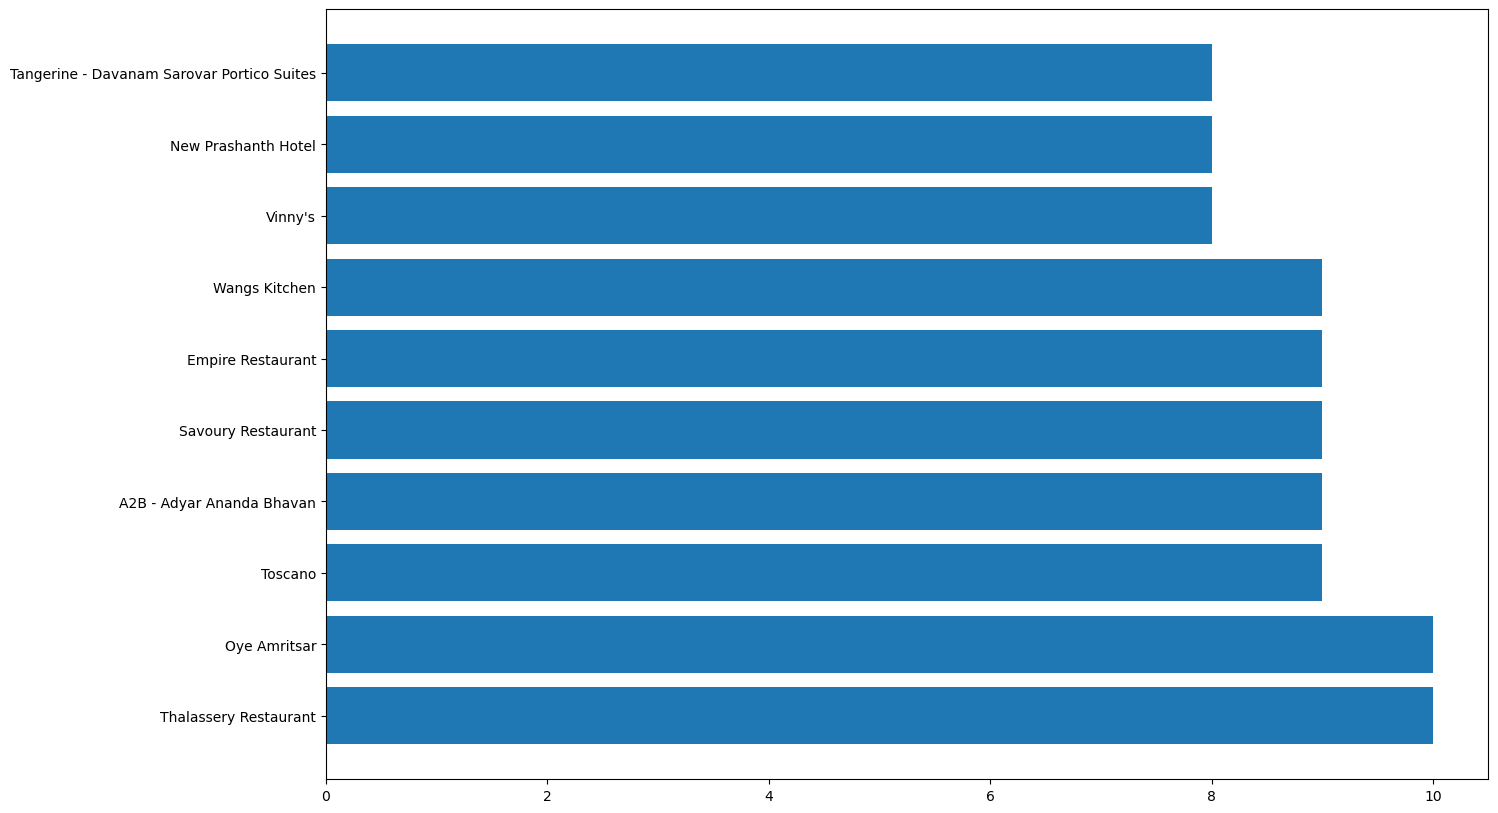

In [22]:
plt.figure(figsize=(15,10))
plt.barh(y=df8.index,width=df8['name'])

15. Which are the most popular cuisines of Bangalore using a related plot?

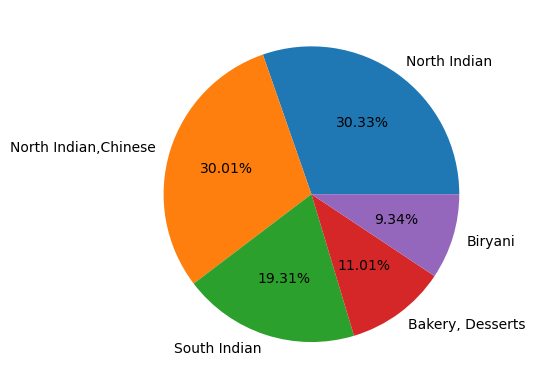

In [24]:
plt.pie(df['cuisines'].value_counts(normalize=True).head(),autopct="%.2f%%",labels=['North Indian','North Indian,Chinese','South Indian','Bakery, Desserts','Biryani'])
plt.show()